# **Self-supervised Learning: Fashionset Classification**
## Advanced Topics in Machine Learning Project Report
University of Bern, 2019

## Goal of the project
The task we chose is classifying two fashion images datasets, the FashionMNIST dataset (https://github.com/zalandoresearch/fashion-mnist by Xiao et al.), comprising 70'000 images in 10 categories and the DeepFashion Dataset (http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html) which consists of approximately 290'000 images, separated in 50 categories. 

## Description of the methods

We implement self-supervised methods with three different self-supervised tasks. We first train a CIFAR-Net network (based on TensorFlow's model, https://github.com/tensorflow/models/blob/master/research/slim/nets/cifarnet.py) for every sub-task using unlabeled images. Afterwards, we add a linear classifier on top of it, fine-tuned the whole model (as proposed in https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751) using labeled images and predict the images categories. Training for the sub-tasks and fine-tuning was made using the Cross-Entropy loss function, with Adam optimizers and decaying learning rates.   

Here are the three different sub-tasks.

- Rotation prediction (based on https://github.com/gidariss/FeatureLearningRotNet by Gidaris et al.). 

    Here, the CIFAR-Net network is trained to predict the rotation of an image. We then replace the last linear layer by two new layers that will serve as a classifier, and we use labeled images to fine-tune the network. The code is found in `rotation.py` .

- Discriminative feature learning with Exemplar CNN (based on https://arxiv.org/abs/1406.6909 by Dosovitskiy et al.)

    For this sub-task, each image is randomly transformed via either a horizontal flip, cropping, resized cropping, color jitter, rotation or affine transformation. The network then learns to assign a unique class to all the variants of each image. As for the other tasks, we then add a linear classifier and fine-tune the model. This sub-task is found under `exemplar_cnn.py` 

- Auto-Encoder: 

    We implemented an auto-encoder with following architecture: the CIFAR-Net model works as the encoder (as seen in `autoencoder.py`), we built the decoder accordingly (code is found in `decoder.py`). We first pretrain the encoder and the decoder together, and then fine-tune the encoder alone. Note that for this task, we do not have to add a classifier on top of the encoder as its final linear layer already has the correct size. 

In addition, we also directly trained our network with supervised learning to allow us to have a comparison with the self-supervised tasks. The code can be found under `supervised_deep_fashion.py`. 

Therefore, for each dataset, we can compare the three subtasks with supervised training and compare the accuracies. 

## Results

Here are the results of the different methods for the different subtasks: 

**FashionMNIST dataset**

| Experiment | Pretraining epochs | Pretraining lr | Finetuning epochs | Finetuning lr | Val accuracy | Test accuracy |
|---|---:|---:|---:|---:|---:|---:|
| Auto-encoder | 15 | 0.001 | 15 | 0.001 | 93.61 | **90.24** |
| Exemplar CNN | 15 | 0.001 | 15 | 0.0001 | 49.45 | **48.05** |
| Rotation | 15 | 0.001 | 15 | 0.001 | 94.43 | **90.52** |
| Supervised | 15 | 0.001 | 15 (?) | 0.001 (?) | 91.73 | **89.49** |



**DeepFashion dataset**

| Experiment | Pretraining epochs | Pretraining lr | Finetuning epochs | Finetuning lr | Val accuracy | Test accuracy |
|---|---:|---:|---:|---:|---:|---:|
| Auto-encoder | 15 | 0.001 (?) | 15 | 0.001 (?) | 24.53 | **24.48** |
| Exemplar CNN | 15 | 0.01 (?) | 15 | 0.01 (?) | 26.28 | **25.62** |
| Rotation | 15 | 0.001 | 15 | 0.001 | 39.77 | **39.86** |
| Supervised | 15 | 0.001 | 15 | 0.001 | 42.77 | **42.33** |

table with all experiments if needed

| Experiment | Pretraining epochs | Pretraining lr | Finetuning epochs | Finetuning lr | Val accuracy | Test accuracy |
|---|---:|---:|---:|---:|---:|---:|
| Auto-encoder | 15 | 0.01 | 15 | 0.001 | 70.92 | 69.49 |
| Auto-encoder | 15 | 0.001 | 15 | 0.0001 | 88.90 | 87.47 |
| Auto-encoder | 15 | 0.001 | 15 | 0.001 | 93.61 | **90.24** |
| Exemplar CNN | 15 | 0.01 | 15 | 0.001 | 22.17 | 10 (?) |
| Exemplar CNN | 15 | 0.001 | 15 | 0.0001 | 49.45 | **48.05** |
| Exemplar CNN | 15 | 0.001 | 15 | 0.001 | 36.93 | 10 (?) |
| Rotation | 15 | 0.01 | 15 | 0.01 | 92.91 | 89.82 |
| Rotation | 15 | 0.001 | 15 | 0.001 | 90.30 | 88.72 |
| Rotation | 15 | 0.001 | 15 | 0.001 | 94.43 | **90.52** |
| Supervised | 15 | 0.001 | 15 (?) | 0.001 (?) | 91.73 | **89.49** |


## Analysis

We tested each method with two different datasets as it is apparent in the "result" paragraph. The results of the FashionMNIST dataset are significantly better than those of the DeepFashion dataset. There are several reasons for that:
- First of all the FashionMNIST has a lot less pictures than the DeepFashion dataset.
- The FashionMnist dataset has pretty similar pictures of clothes (further down there are some pictures). There is always a black background and white clothes. 
- The DeepFashion dataset is a lot different. There are different backgrounds, different models which pose in different angles and wear different clothes. 

One can say that there is a lot more noise/additional information in the DeepFashion dataset, which makes learning harder for our methods. 

Additionally we didn't use that much epochs to learn. This means the network hasn't had much time to learn the different features which makes it harder to learn more complex images (DeepFashion dataset) as effectively as the "easier" pictures of the FashionMNIST dataset.

There were 4 different methods used: An auto-encoder, examplar CNN, Rotation Prediction and Supervised learning. 
Out of these four, as expected, the supervised learning approach performed very well in comparison with the other methods. The best method in the DeepFashion dataset, which makes sense if one considers the short amount of pretraining and finetuning. Surprisingly with the FashionMNIST dataset the supervised approach was the second worst method.
The rotation prediction method did perform in both tasks pretty well. This method is based on self-supervised learning, which needs a lot less attention than supervised training.
The examplar CNN method performed not very good in both cases. <span style="color:red">werum isch das so?</span>
In our opinion the rotation prediction network did perform the best, even though the results are not significantly better than the supervised approach. The great advantage about the rotation prediction is, that it is self-supervised and not supervised.

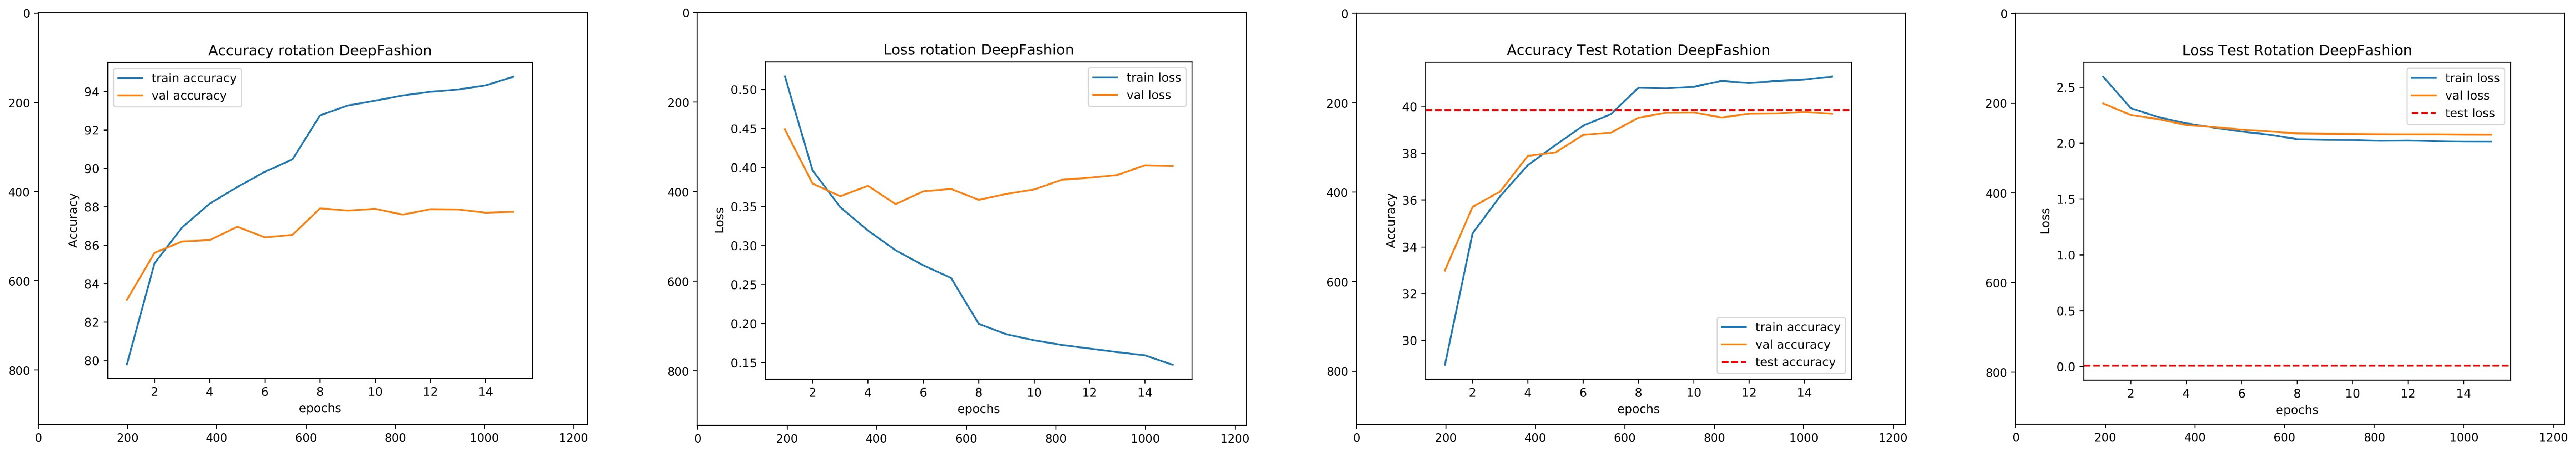

In [19]:
# Import some libraries, so we can display the pictures of the results
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision
from PIL import Image

plot1 = Image.open('performance_plots/rot-deep-accuracy.jpg')
plot2 = Image.open('performance_plots/rot-deep-overfitting.jpg')
plot3 = Image.open('performance_plots/rot-deep-test-accuracy.jpg')
plot4 = Image.open('performance_plots/rot-deep-test.jpg')
deepfashion = [plot1,plot2,plot3,plot4]

plot = plt.figure(figsize=(50, 45), dpi= 200, facecolor='w', edgecolor='k')
for i, img in enumerate(deepfashion):
    plot.add_subplot(1, 5, i+1)
    plt.imshow(img) 
    
plt.show()

Above you see some plots about the training and testing of the DeepFashion dataset with the rotation prediction method.
In the second image (Loss rotation DeepFashion) there is a clear overfitting going on. The train loss is a lot smaller than the validation loss. This is why in the first image (accuarcy rotation DeepFashion) the training accuarcy has such a high accuracy.

In the third and fourth picture there are again some train and validation loss even though we are testing the model. This is because a pre-trained model gets repurposed.
- First  the pre-trained model has the classifier removed and a new one gets added which fits the purposes of the experiment better. In the next (fine-tuning)-step the whole pre-trained model gets thrown away and only the architecture gets kept. With the arcitecture we once again learn the model from scratch. This is possible because the DeepFashion dataset has lots of data.

In the third picture (Accuracy Test Rotation DeepFashion) the accuracy decreases which could be a consequence of the disappearing overfitting in the fourth picture. but as you can see in the fourth picture (Loss Test Rotation DeepFashion) the overfitting disappeared, which could be a direct 

<span style="color:red">stimmt das so?</span>

## Examples of Use

You just need to download the DeepFashion dataset and place it in the root directory in a folder called `/img`. 

- The dataset can be found under: http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.

After that the only thing you need to do is execute the main.py file. This will start the whole process.

1. The main.py file will then start the training of the different pretraining methods.
2. After the training the model is finetuned.
3. In a final step we evalute each method with the testset of each dataset.

In each step we are able to plot the curves and to compare the results. These plots get saved in a folder named /Plot.

In [13]:
#load datasets
fashionmnist = torchvision.datasets.FashionMNIST('fashion_mnist/', train=True, transform=None, target_transform=None, download=False)
        


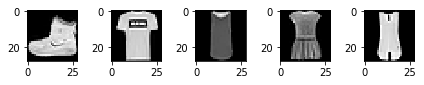

In [6]:
# here are some pictures of the fashionMNIST dataset
fig = plt.figure()
for i in range (len(fashionmnist)):
    sampleImg = fashionmnist[i][0]
    fig.add_subplot(1,5,i+1)
    plt.imshow(sampleImg, cmap='gray')
    plt.tight_layout()
    if i == 4:   
        plt.show()  
        break

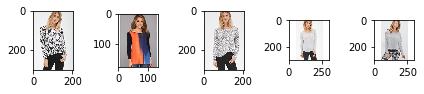

In [4]:
# here are some pictures of the DeepFashion dataset
# in the dataloader they all get scaled to the size of 32x32 pixel

image1 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000001.jpg')
image2 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000002.jpg')
image3 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000003.jpg')
image4 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000004.jpg')
image5 = Image.open('img/Abstract_Brushstroke_Pocket_Top/img_00000005.jpg')
deepfashion = [image1, image2, image3, image4, image5]

fig1 = plt.figure()
for i, img in enumerate(deepfashion):
    fig1.add_subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')    
    plt.tight_layout()

plt.show()


For each method we have different training methods. Here is a code snippet from the Image Rotation Prediction where we 
- Call the model.
- Define the loss, optimizer and scheduler.
- Train the network

```python
def train_rotation_net():

    """Trains the rotation model."""
    print("=============================================================")
    print("========== Train Rotation Model with FashionMNIST ===========")
    print("=============================================================\n")

    model = CifarNet(input_channels=1, num_classes=4)
    model = model.to(DEVICE)

    # Criteria NLLLoss which is recommended with Softmax final layer
    loss_fn = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Decay LR by a factor of 0.1 every 4 epochs
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=4, gamma=0.1)

    return train(model, loss_fn, optimizer, scheduler, EPOCHS, train_loader_fashion_mnist, val_loader_fashion_mnist)

```

Our model, called CifarNet is built like this:

```python
class CifarNet(nn.Module):
    """CifarNet model"""

    def __init__(self, input_channels, num_classes=10):
        super(CifarNet, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=(5, 5), bias=False)
        self.max1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.batch1 = nn.BatchNorm2d(num_features=64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=(5, 5), bias=False)
        self.batch2 = nn.BatchNorm2d(num_features=64)
        self.max2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2)
        self.flat = flatten
        self.fc1 = nn.Linear(1600, 384, bias=True)
        self.drop = nn.Dropout(0.5)
        self.fc2 = nn.Linear(384, 192, bias=True)
        self.fc3 = nn.Linear(192, num_classes, bias=True)

    def forward(self, x):
        out = self.conv1(x)
        out = self.max1(out)
        out = self.batch1(out)
        out = self.conv2(out)
        out = self.batch2(out)
        out = self.max2(out)
        out = self.flat(out)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out
```

After the training it is necessary that we finetune the model before we test it with the Deepfashion dataset:
- We define the loss function, optimizer and scheduler again
- Replace the last linear layer `self.fc3` by two fully connected layers 
- In the last step we call the fine tuning function. 


    
```python
def fine_tune_rotation_model(model):
    """Fine tunes the rotation model."""
    print("============================================================")
    print("======== Fine Tune Rotation Model with DeepFashion =========")
    print("============================================================\n")

    # Criteria NLLLoss which is recommended with Softmax final layer
    loss_fn = nn.CrossEntropyLoss()

    for param in model.parameters():
        param.requires_grad = False

    for param in model.fc3.parameters():
        param.requires_grad = True

    # replace fc layer with 50 outputs
    model.fc3 = nn.Sequential(nn.Linear(192, 192),
                              nn.Linear(192, 50, bias=True)
                              )

    # Observe that all parameters are being optimized
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Decay LR by a factor of 0.1 every 4 epochs
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=4, gamma=0.1)

    model = model.to(DEVICE)
    return fine_tune(model, loss_fn, optimizer, scheduler, EPOCHS, train_loader_deep_fashion, val_loader_deep_fashion)

```



All that is left in the final step is to test the trained model on a testset for classification purposes. We keep the same loss function and call the function from `test.py`

```python
def test_classification_on_rotation_model(model):
    """Tests the rotation model."""
    print("=============================================================")
    print("== Test Classification on Rotation Model with FashionMNIST ==")
    print("=============================================================\n")
    loss_fn = nn.CrossEntropyLoss()
    model = model.to(DEVICE)
    return test(model, loss_fn, EPOCHS, test_loader_fashion_mnist)
```